<a href="https://colab.research.google.com/github/amandabenjamin/Food_Sales_Predictions/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amanda Benjamin

Project 1: Sales prediction for food items sold at various stores.

# Project 1, Part 1

*   Goal: Learning how to read in data 



In [ ]:
#project 1, part 1

from google.colab import drive #accessing drive (and data) from google colab
drive.mount('/content/drive',force_remount=True)

#import pandas libary 
import pandas as pd

#assign data location to variable named 'filename'
filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas for Data Science/DATA /sales_predictions.csv' 

df = pd.read_csv(filename)#import the data into dataframe (df)
df.head() #take a look at the dataframe (top 5)

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Project 1, Part 2

*   Learning how to 'clean up' data 
*   Learning how to commit to Git Hub Repo. 




In [ ]:
#project 1, part 2

df.info() #print information about information about dataframe (df) including the index dtype and columns, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


NOTE: There is missing data in Item_Weight and Outlet_Size!


*   Columns include int, float, and object data

**1) How many rows and columns?**

In [ ]:
count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]  # gives number of col count

print(f'There are {count_row} rows and {count_col} columns')

There are 8523 rows and 12 columns


**2) What are the datatypes of each variable?**

In [ ]:
for i in df:
    print(f'{i} is a/an {df.dtypes[i]}') #print column name and its dtype 

Item_Identifier is a/an object
Item_Weight is a/an float64
Item_Fat_Content is a/an object
Item_Visibility is a/an float64
Item_Type is a/an object
Item_MRP is a/an float64
Outlet_Identifier is a/an object
Outlet_Establishment_Year is a/an int64
Outlet_Size is a/an object
Outlet_Location_Type is a/an object
Outlet_Type is a/an object
Item_Outlet_Sales is a/an float64


**3) Are there duplicates? If so, drop any duplicates.**

In [ ]:
#If there are duplicates, we can use sum to see how many 
#b/c True boolian adds just like 1
df.duplicated(keep=False).sum() 

if df.duplicated(keep=False).sum() > 0: #if the sum of duplicates is greater than 0
  print('Looks like there are duplicates!') #print
else: #if not 
  print(f'No duplicates here - The sum of all duplicated values equals {df.duplicated(keep=False).sum()}') #print

#we can also check our work by counting the number of non-duplicates 
#which should equal row number
(~df.duplicated()).sum()

if (~df.duplicated()).sum() == count_row: #if the sum of all duplicates equals the number of rows
  print('Yup, still no duplicates when double checking!') #print
else: #if not 
  print(f'This is not good') #print

No duplicates here - The sum of all duplicated values equals 0
Yup, still no duplicates when double checking!


**4)  Identify missing values.**

In [ ]:
#df.info will tell you where there are missing data 
#anything under 8523 non-null means that there is missing data 
df.info()
#Item_Weight and Outlet_Size contain missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# to find the exact location we can also try
IW_missing_loc = df.loc[df['Item_Weight'].isna(),:] # Looks at the rows that contain NaN for Item_Weight
OS_missing_loc = df.loc[df['Outlet_Size'].isna(),:] # Looks at the rows that contain NaN for outlet size

In [ ]:
IW_missing_loc #run to display locations

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
OS_missing_loc #run to display locations

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


**5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).**

I already will rule out droping data - mostly becasue I will be droping more than 5% of my data (too many rows between the two columns of missing data) ... which is not good data science practice 

In [ ]:
#lets take a look at Item_Weight 

#df['Item_Weight'].value_counts(normalize=True)#I'm not a fan of this output for floats. ...

df.groupby('Item_Weight').sum() #group the df by Item weight values 
#Item_Weight is a float that ranges from 4.555 to 21.350

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,,,,
4.555,0.137447,446.9176,7987,7046.8272
4.590,0.283160,562.7300,9989,6338.4160
4.610,0.820166,1216.7772,14016,13955.1680
4.615,0.408006,929.8200,8000,16312.1000
4.635,0.705721,635.9970,10009,10922.4490
...,...,...,...,...
21.000,0.329558,1163.5868,12004,7168.6686
21.100,0.907614,2433.4410,34015,31475.0292
21.200,0.203484,872.8954,10010,13818.6790


I think if we fill in the missing data with 0's we will end up not only presenting outliers but most importantly skewing the data - which we dont want to do if we are trying to understand what the data is telling us. 

I prefer to fill in the data using interpolation (estimating the value given known data), and there is a pandas funciton for this! 

In [ ]:
 df['Item_Weight'] = df['Item_Weight'].interpolate(method='linear') #data appears to be increasing linerarly (based on output above), not exponetially - ect. 
 #we will use a liner regression equ. to predict and replace missing values in this column. 

In [ ]:
#check that it worked ...

if df['Item_Weight'].isna().sum() == 0: #if the number of missing values in Item Weight column equals 0
  print('Missing Data Fixed!') #print
else: #if not 
  print(f'This is not good') #print

Missing Data Fixed!


In [ ]:
#lets take a look at outlet size now
df['Outlet_Size'].value_counts()#outlet_Size is ordinal ... High, Medium, Small 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#Thought: outlet size might be impacted by another column (dependent relationship)
#we can use that relationship to fill in missing outlet size based on that relatioship 

#check to see if there is a relationship using groupby method
#make it into a dataframe in case there are more methods I want for analysis 

#comment out others to see grouping of one tmp option
tmp = df.groupby('Item_Outlet_Sales')[['Outlet_Size']].sum() #group outlet size by Item Outlet Sales --> seems to be a pattern
#tmp = df.groupby('Outlet_Type')[['Outlet_Size']].sum() #group outlet size by Outlet Type --> does not appear to be relationship
#tmp = df.groupby('Outlet_Location_Type')[['Outlet_Size']].sum() #group outlet size by Outlet location type --> does not appear to be relationship
tmp


,Outlet_Size
Item_Outlet_Sales,
33.2900,0
33.9558,Small
34.6216,Small
35.2874,0
36.6190,Small
...,...
10306.5840,Medium
10993.6896,Medium
11445.1020,Medium


In [ ]:
df_IOS_ordered = df.sort_values(by='Item_Outlet_Sales', ascending=True)  #sort the data frame by item outlet sales (low to high)

save = df_IOS_ordered.Outlet_Size.fillna(method='bfill') #with oulet size now sorted by item outlet sales, 
#use back fill to fill in missing data (preserving relationship we found earlier)

save #check it worked
df['Outlet_Size'] = save #replace old outlet size column with the new one we just filled in

In [ ]:
#check to see the order is not changed
df['Outlet_Size'] #order is still preserved!

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [ ]:
#check that it worked 
if df['Outlet_Size'].isna().sum() == 0: #if the number of missing outlet size values equals 0
  print('Missing Data Fixed!') #print
else: #if not
  print(f'This is not good') #print

Missing Data Fixed!


**6) Confirm that there are no missing values after addressing them.**

In [ ]:
#done above
#but we can also check with
df.info() #prints out non-null count (it now is the same value, for all columns, as the number of rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)**

In [ ]:
df.Item_Identifier.value_counts() #seems fine

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
df.Item_Fat_Content.value_counts() #inconsistant

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.Item_Type.value_counts()#seems fine

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df.Outlet_Identifier.value_counts()#seems fine

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df.Outlet_Location_Type.value_counts()#seems fine

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df.Outlet_Type.value_counts()#seems fine

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
#use the replace to fix this 
df.Item_Fat_Content = df.Item_Fat_Content.replace('LF', 'Low Fat') #replace any instance of LF with Low Fat
df.Item_Fat_Content = df.Item_Fat_Content.replace('reg', 'Regular') #replace any instance of reg with Regular
df.Item_Fat_Content = df.Item_Fat_Content.replace('low fat', 'Low Fat') #replace any instance of low fat with Low Fat

df.Item_Fat_Content.value_counts() #display the groups within Item Fat Content (should be 2 now )

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**8) For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [ ]:
df.describe() #method prints out summary statistics for numerical columns 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.831222,0.066132,140.992782,1997.831867,2181.288914
std,4.445074,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.600000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Project 1, Part 3

*   Complete any statistical analyses that might help you understand, explain, or model with your data 




In [ ]:
#import a new libary
import matplotlib.pyplot as plt
import seaborn as sns

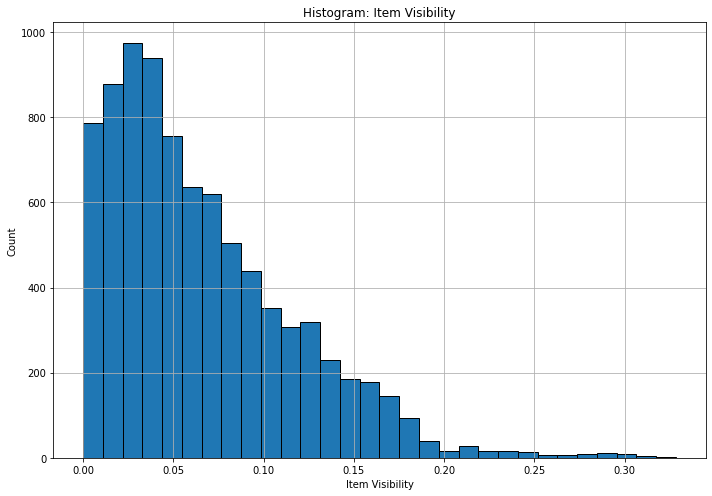

In [ ]:
#histogram: used to summarize continuous data (singular category) in the form of frequency

#Item_Visibility
fig,ax =  plt.subplots(1,1,figsize = (10,7),tight_layout = True);
df['Item_Visibility'].hist(bins = 30, edgecolor = 'black');

ax.set_xlabel('Item Visibility')
ax.set_ylabel('Count')
ax.set_title('Histogram: Item Visibility')

plt.show()

We observe a right skew in this feature (lower values are more frequent) - possibly some outliers are present. Item Visibility is defined as: The percentage of total display area of all products in a store allocated to the particular product - so this histogram indicates, that per usual, a low percentage of the total display area is allocated per featured product. 

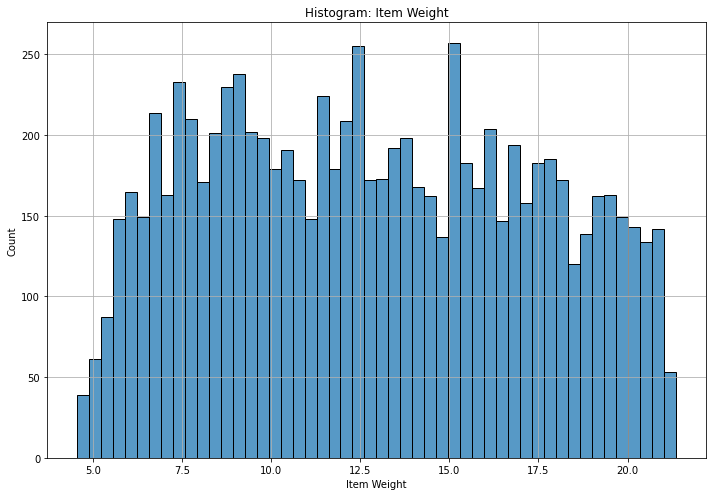

In [ ]:
#Item_Weight
fig,ax =  plt.subplots(1,1,figsize = (10,7),tight_layout = True);
sns.histplot(data = df, x = 'Item_Weight', bins = 50, 
             label = 'Item Weight').set(title = 'Histogram: Item Weight',
                                        xlabel = 'Item Weight',ylabel = 'Count');

sns.set_style({'axes.grid': True}); #provide a grid 

We can see from the shape of the histogram above that his variable appears to be multimodal.

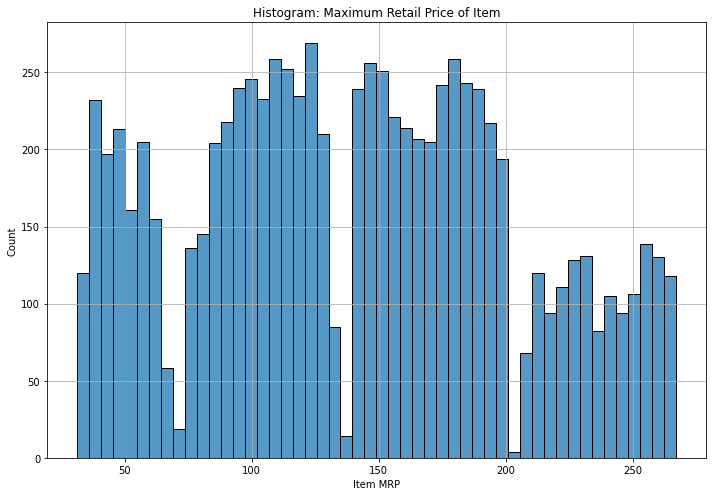

In [ ]:
#Item_MRP 
fig,ax =  plt.subplots(1,1,figsize = (10,7),tight_layout = True);
sns.histplot(data = df, x = 'Item_MRP', bins = 50, 
             label = 'Item MRP').set(title = 'Histogram: Maximum Retail Price of Item',
                                     xlabel = 'Item MRP',ylabel = 'Count');

sns.set_style({'axes.grid': True}); #provide a grid 

We can see from the shape of the histogram above that his variable is without a doubt multimodal.

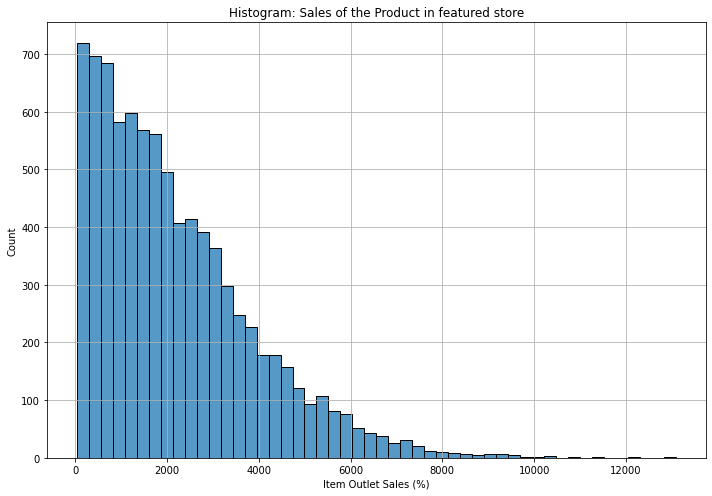

In [ ]:
#Item_Outlet_Sales
fig,ax =  plt.subplots(1,1,figsize = (10,7),tight_layout = True);
sns.histplot(data = df, x = 'Item_Outlet_Sales', bins = 50, 
             label = 'Item Outlet Sales').set(title = 'Histogram: Sales of the Product in featured store',
                                              xlabel = 'Item Outlet Sales (%)',ylabel = 'Count');

sns.set_style({'axes.grid': True}); #provide a grid 


Item Outlet Sales (sales of the product in the featured store) is left skewed (overwhelmingly lower sales in the featured store than higher sales in the featured store). 

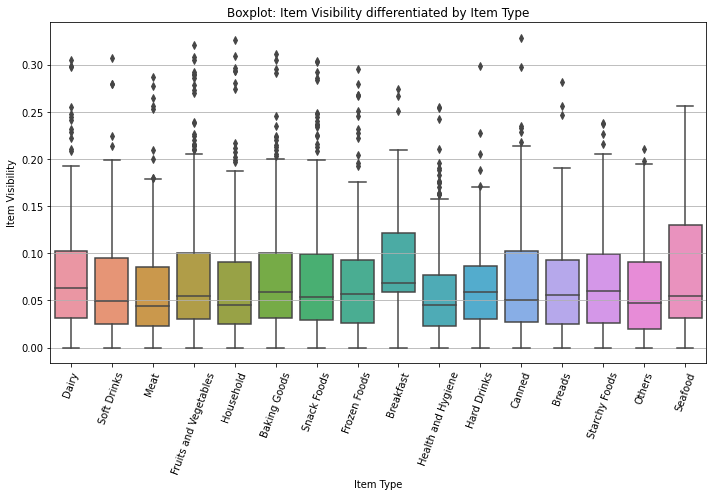

In [ ]:
#boxplot: visualize the distribution of quantitative values 
plt.subplots(1,1,figsize = (10,7),tight_layout = True);
#item visibility (y) by Item Type (x)
sns.boxplot( data = df, x = 'Item_Type',
            y = 'Item_Visibility').set(title = 'Boxplot: Item Visibility differentiated by Item Type',
                                       xlabel = 'Item Type', ylabel = 'Item Visibility'); 
plt.xticks(rotation = 70);

There are alot of apparent outliers observed in this graphical relationship. Seafood is the only item type that does not include outliers. Additionally, a large majority (if not all Item types) appear to have a right skewed distrobution (bulk of the data has higher visibility (more display area) than lower visibility (less display area within the store). 

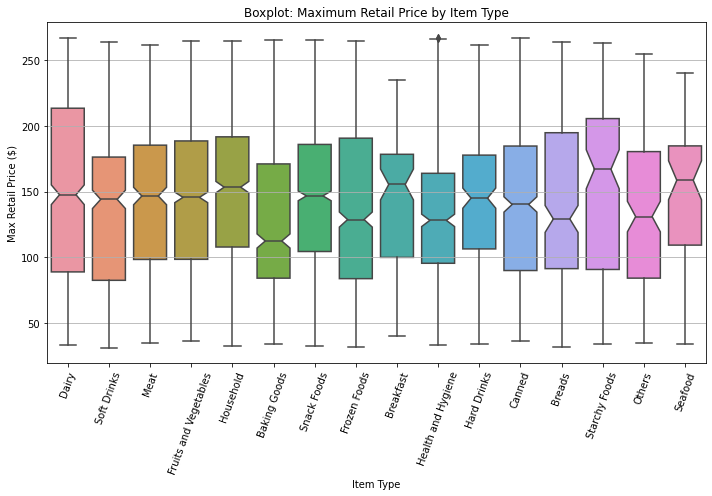

In [ ]:
#item MRP (y) by Item Type (x)
plt.subplots(1,1,figsize = (10,7),tight_layout = True);
sns.boxplot( data = df, x = 'Item_Type',
            y = 'Item_MRP',
            notch = True).set(title = 'Boxplot: Maximum Retail Price by Item Type',
                                       xlabel = 'Item Type', ylabel = 'Max Retail Price ($)'); 
plt.xticks(rotation = 70);

Most of the items (besides Soft Drinks, Baking Goods, and Breakfast to name a few) appear to have a normal distrobution for Retail price. 

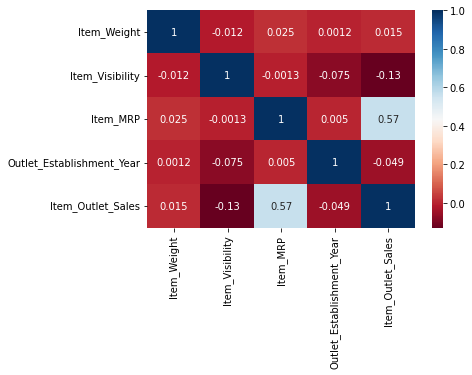

In [ ]:
#Heatmap: correlation
sns.heatmap(df.corr(),cmap = 'RdBu',annot = True); #display correlation of features in dataframe using heatmap


Overwhelmingly, minute negative correlation between the variables. We do see, however, a moderate positive correlation between Item MRP and Item Outlet sales - suggesting as the retail price increases as sales of the product tends to increase. It is important to note: this is not a causal relationship! 